# Importing the Libraries

In [34]:
import pandas as pd
import numpy as np
import glob

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,roc_curve,auc, classification_report, accuracy_score, f1_score, precision_score, recall_score



# Load Dataset
#### Data: https://www.kaggle.com/datasets/chethuhn/network-intrusion-dataset


In [2]:
# Ambil semua file CSV
files = glob.glob("*.csv")
print("Ditemukan", len(files), "file CSV")

def detect_label(x):
    cleaned_label = str(x).strip().lower() 
    return "Normal" if cleaned_label == "benign" else "Attack"

dfs = []

for f in files:
    try:
        print(f"Sedang memproses: {f}...")
        df = pd.read_csv(f, low_memory=False)

    except Exception as e:
        print(f"ERROR membaca {f}: {e}")
        continue

    # Buat kolom BinaryLabel
    df["BinaryLabel"] = df[" Label"].apply(detect_label)
    
    dfs.append(df)
    print(f"   -> Berhasil. Jumlah baris: {len(df)}")

# Gabungkan semua
df = pd.concat(dfs, ignore_index=True)

print("\n=== TOTAL GABUNGAN ===")
print(f"{len(df):,} baris")
print(f"Jumlah Kolom: {len(df.columns)}")

print("\n=== Distribusi Binary Label ===")
print(df["BinaryLabel"].value_counts())

Ditemukan 8 file CSV
Sedang memproses: Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv...
   -> Berhasil. Jumlah baris: 170366
Sedang memproses: Wednesday-workingHours.pcap_ISCX.csv...
   -> Berhasil. Jumlah baris: 692703
Sedang memproses: Monday-WorkingHours.pcap_ISCX.csv...
   -> Berhasil. Jumlah baris: 529918
Sedang memproses: Tuesday-WorkingHours.pcap_ISCX.csv...
   -> Berhasil. Jumlah baris: 445909
Sedang memproses: Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv...
   -> Berhasil. Jumlah baris: 225745
Sedang memproses: Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv...
   -> Berhasil. Jumlah baris: 288602
Sedang memproses: Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv...
   -> Berhasil. Jumlah baris: 286467
Sedang memproses: Friday-WorkingHours-Morning.pcap_ISCX.csv...
   -> Berhasil. Jumlah baris: 191033

=== TOTAL GABUNGAN ===
2,830,743 baris
Jumlah Kolom: 80

=== Distribusi Binary Label ===
BinaryLabel
Normal    2273097
Attack     557646
Name: count,

# Data Cleaning

In [3]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,BinaryLabel
0,389,113095465,48,24,9668,10012,403,0,201.416667,203.548293,...,203985.500,5.758373e+05,1629110,379,13800000.0,4.277541e+06,16500000,6737603,BENIGN,Normal
1,389,113473706,68,40,11364,12718,403,0,167.117647,171.919413,...,178326.875,5.034269e+05,1424245,325,13800000.0,4.229413e+06,16500000,6945512,BENIGN,Normal
2,0,119945515,150,0,0,0,0,0,0.000000,0.000000,...,6909777.333,1.170000e+07,20400000,6,24400000.0,2.430000e+07,60100000,5702188,BENIGN,Normal
3,443,60261928,9,7,2330,4221,1093,0,258.888889,409.702161,...,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN,Normal
4,53,269,2,2,102,322,51,51,51.000000,0.000000,...,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN,Normal


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 80 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max         

In [5]:
df.columns = df.columns.str.strip() #Menghapus spasi di awal dan akhir nama kolom

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 80 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Backward Packets       int64  
 4   Total Length of Fwd Packets  int64  
 5   Total Length of Bwd Packets  int64  
 6   Fwd Packet Length Max        int64  
 7   Fwd Packet Length Min        int64  
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        int64  
 11  Bwd Packet Length Min        int64  
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 float64
 15  Flow Packets/s               float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max                 int64  
 19  

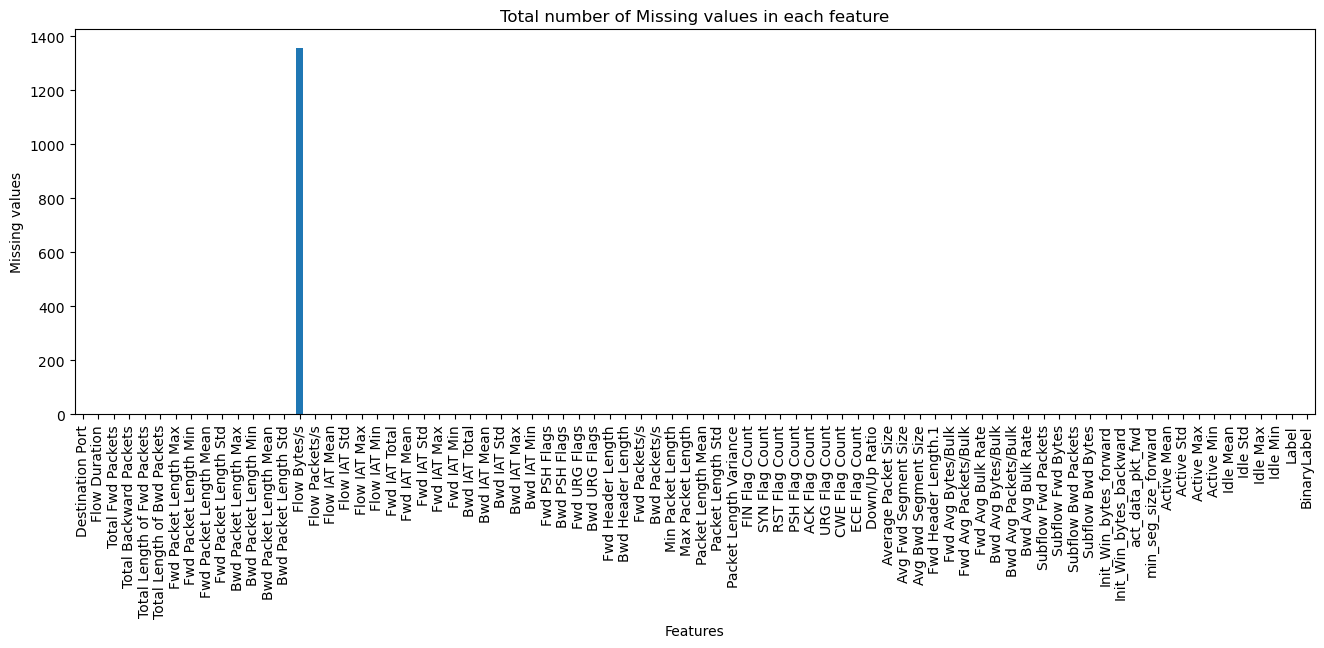

In [7]:
#Fungsi untuk visualisasi mising value
def plotMissingValues(dataframe):
    missing_values = dataframe.isnull().sum()
    fig = plt.figure(figsize=(16, 5))
    missing_values.plot(kind='bar')
    plt.xlabel("Features")
    plt.ylabel("Missing values")
    plt.title("Total number of Missing values in each feature")
    plt.show()

plotMissingValues(df)

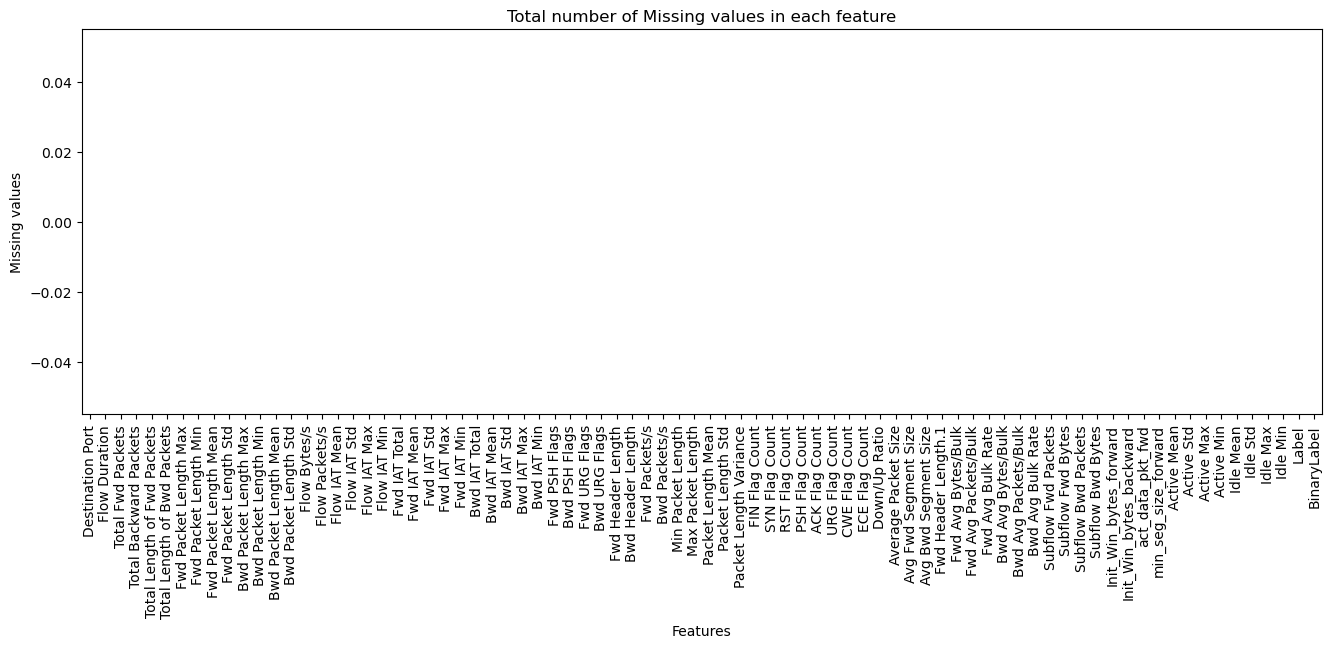

In [8]:
# Hapus baris kosong
plotMissingValues(df.dropna())

In [9]:
numeric_cols = df.select_dtypes(include=np.number).columns
object_cols = df.select_dtypes(include='object').columns

# NILAI NEGATIF (Hanya pada Kolom Numerik)
negative_check = (df[numeric_cols] < 0).any()
print("Kolom yang Mengandung Nilai Negatif:\n", negative_check[negative_check == True])

for col in negative_check[negative_check == True].index:
    df[col] = df[col].clip(lower=0)

# NILAI INFINITY (Khusus CIC-IDS 2017)
infinity_mask = np.isinf(df[numeric_cols]).any()
print("\nKolom yang Mengandung Nilai Infinity:\n", infinity_mask[infinity_mask == True],'\n')

for col in infinity_mask[infinity_mask == True].index:
    df[col].replace([np.inf, -np.inf], np.nan, inplace=True)
    df[col].fillna(0, inplace=True)

# STRING KOSONG (Hanya pada Kolom Non-Numerik)
object_cols = df.select_dtypes(include='object').columns
empty_string_sum = df[object_cols].apply(lambda x: (x == '').sum())
print("Total String Kosong per Kolom:\n", empty_string_sum[empty_string_sum > 0],'\n')

Kolom yang Mengandung Nilai Negatif:
 Flow Duration              True
Flow Bytes/s               True
Flow Packets/s             True
Flow IAT Mean              True
Flow IAT Max               True
Flow IAT Min               True
Fwd IAT Min                True
Fwd Header Length          True
Bwd Header Length          True
Fwd Header Length.1        True
Init_Win_bytes_forward     True
Init_Win_bytes_backward    True
min_seg_size_forward       True
dtype: bool

Kolom yang Mengandung Nilai Infinity:
 Flow Bytes/s      True
Flow Packets/s    True
dtype: bool 



/tmp/ipykernel_71750/1355840427.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace([np.inf, -np.inf], np.nan, inplace=True)
/tmp/ipykernel_71750/1355840427.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

Total String Kosong per Kolom:
 Series([], dtype: int64) 



In [10]:
df['Label'].unique()

array(['BENIGN', 'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection', 'DoS slowloris', 'DoS Slowhttptest',
       'DoS Hulk', 'DoS GoldenEye', 'Heartbleed', 'FTP-Patator',
       'SSH-Patator', 'DDoS', 'Infiltration', 'PortScan', 'Bot'],
      dtype=object)

In [11]:
# Cleaning Karakter Unicode
df['Label'] = df['Label'].str.replace( " � ", '-', regex=False) 

print("Label Unik Setelah Perbaikan:", df['Label'].unique())

Label Unik Setelah Perbaikan: ['BENIGN' 'Web Attack-Brute Force' 'Web Attack-XSS'
 'Web Attack-Sql Injection' 'DoS slowloris' 'DoS Slowhttptest' 'DoS Hulk'
 'DoS GoldenEye' 'Heartbleed' 'FTP-Patator' 'SSH-Patator' 'DDoS'
 'Infiltration' 'PortScan' 'Bot']


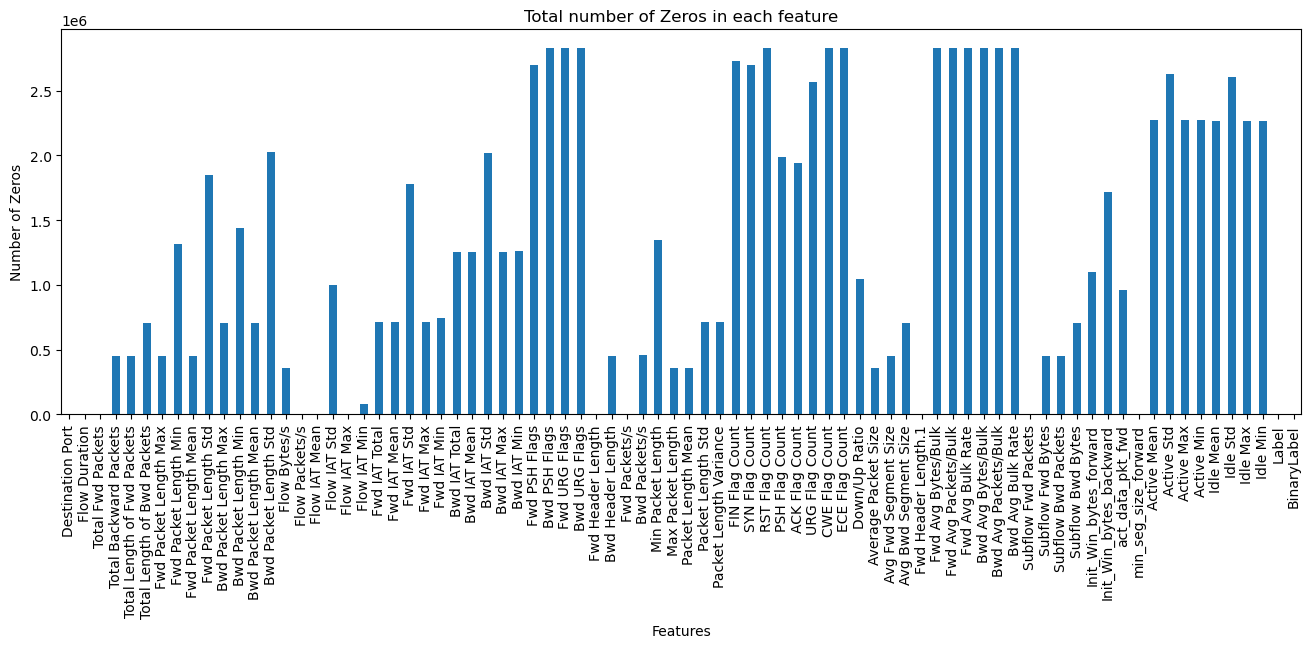

In [12]:
# Fungsi untuk visualisasi jumlah nilai 0 di tiap kolom
def plotZeroValues(dataframe):
    zero_counts = (dataframe == 0).sum()
    fig = plt.figure(figsize=(16, 5))
    zero_counts.plot(kind='bar')
    plt.xlabel("Features")
    plt.ylabel("Number of Zeros")
    plt.title("Total number of Zeros in each feature")
    plt.show()

plotZeroValues(df)


In [13]:
pd.set_option('display.max_rows', None)

# Hitung jumlah nilai 0
zero_counts = (df == 0).sum()
zero_columns = zero_counts[zero_counts > 0]
print(zero_columns)

Destination Port                  1696
Flow Duration                     2982
Total Backward Packets          453519
Total Length of Fwd Packets     449170
Total Length of Bwd Packets     707746
Fwd Packet Length Max           449170
Fwd Packet Length Min          1317226
Fwd Packet Length Mean          449170
Fwd Packet Length Std          1850684
Bwd Packet Length Max           707746
Bwd Packet Length Min          1437867
Bwd Packet Length Mean          707746
Bwd Packet Length Std          2026514
Flow Bytes/s                    358719
Flow Packets/s                    2982
Flow IAT Mean                     2982
Flow IAT Std                    998326
Flow IAT Max                      2981
Flow IAT Min                     78560
Fwd IAT Total                   711912
Fwd IAT Mean                    711912
Fwd IAT Std                    1776199
Fwd IAT Max                     711912
Fwd IAT Min                     743875
Bwd IAT Total                  1249499
Bwd IAT Mean             

In [14]:
# PENGHAPUSAN KOLOM
cols_to_drop = [
    'Label', # Label Multi-Class Asli (tidak dipakai karena pakai binary label)
    'Fwd Header Length.1', # Kolom Redundan
    
    # Kolom Bulk (Hampir selalu 0, tidak informatif)
    'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 
    'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate', 
    'Bwd PSH Flags', 'Bwd URG Flags' 
]

df = df.drop(columns=cols_to_drop)
print(f"Total Kolom Tersisa: {len(df.columns)}")

Total Kolom Tersisa: 70


# Data Preprocessing

In [15]:
# Mengubah BinaryLabel menjadi numerik 0 dan 1
df['BinaryLabel'] = df['BinaryLabel'].map({'Normal': 0,'Attack': 1})

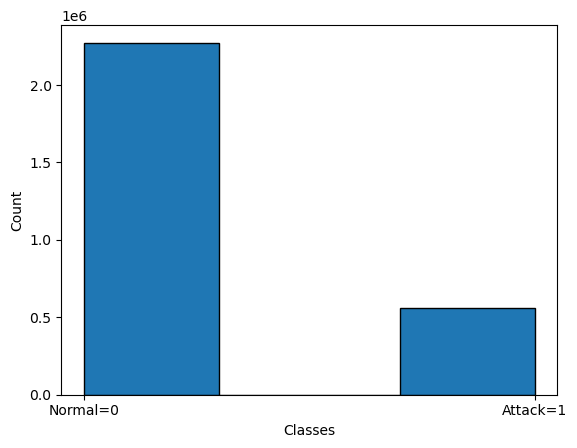

In [16]:
plt.hist(df['BinaryLabel'], bins=[0, 0.3, 0.7, 1], edgecolor='black')
plt.xticks([0, 1], labels=['Normal=0', 'Attack=1'])
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()

In [17]:
# Resample
df_majority = df[df['BinaryLabel'] == 0] # Kelas Mayoritas
df_minority = df[df['BinaryLabel'] == 1] # Kelas Minoritas

# Tentukan ukuran sampel
n_minority = len(df_minority) 

# Lakukan undersampling tanpa pengembalian (replace=False)
df_majority_undersampled = resample(
    df_majority,
    replace=False,          
    n_samples=n_minority,   
    random_state=42         # Untuk memastikan hasil konsisten
)

# Gabungkan Data yang Sudah Seimbang
df_balanced = pd.concat([df_majority_undersampled, df_minority])

print("\n=== Distribusi Kelas Setelah Undersampling ===")
print(df_balanced['BinaryLabel'].value_counts())
print(f"Total Baris Baru: {len(df_balanced):,} (sekitar 1.11 juta)")



=== Distribusi Kelas Setelah Undersampling ===
BinaryLabel
0    557646
1    557646
Name: count, dtype: int64
Total Baris Baru: 1,115,292 (sekitar 1.11 juta)


In [18]:
# PEMILIHAN FEATURE
df = df_balanced
X = df.drop(columns=['BinaryLabel'])
Y = df['BinaryLabel']

In [19]:
# Standardization

# Kolom yang tidak boleh diskalakan (sudah biner/kategorikal diskrit)
cols_no_scale = [
    'Destination Port', 
    'Fwd PSH Flags', 'Fwd URG Flags', 
    'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 
    'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count'
]


# Kolom yang HARUS diskalakan (variabel kontinu dengan rentang besar)
numeric_cols_to_scale = X.select_dtypes(include=np.number).columns.difference(cols_no_scale)

scaler = StandardScaler()
# Lakukan Scaling hanya pada kolom-kolom yang perlu
X[numeric_cols_to_scale] = scaler.fit_transform(X[numeric_cols_to_scale])

print("Contoh nilai Flow Duration (setelah Scaling):\n", X['Flow Duration'].head())



Contoh nilai Flow Duration (setelah Scaling):
 1379160   -0.536475
2754507   -0.536475
1504770   -0.403804
1529545   -0.533040
827466    -0.536475
Name: Flow Duration, dtype: float64


In [20]:
# DATA SPLITTING
print("DATA SPLITTING (70% Train, 20% Test)")

X_train, X_test, Y_train, Y_test = train_test_split(
    X, 
    Y, 
    test_size=0.3, 
    random_state=42, 
    stratify=Y # Memastikan rasio attack:normal = 50:50
)

print(f"Jumlah Total Data Latih (Train): {len(X_train):,}")
print(f"Jumlah Total Data Uji (Test): {len(X_test):,}")

DATA SPLITTING (70% Train, 20% Test)
Jumlah Total Data Latih (Train): 780,704
Jumlah Total Data Uji (Test): 334,588


# Modeling

## Random Forest

In [21]:
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, Y_train)
rf_pred = rf_model.predict(X_test)

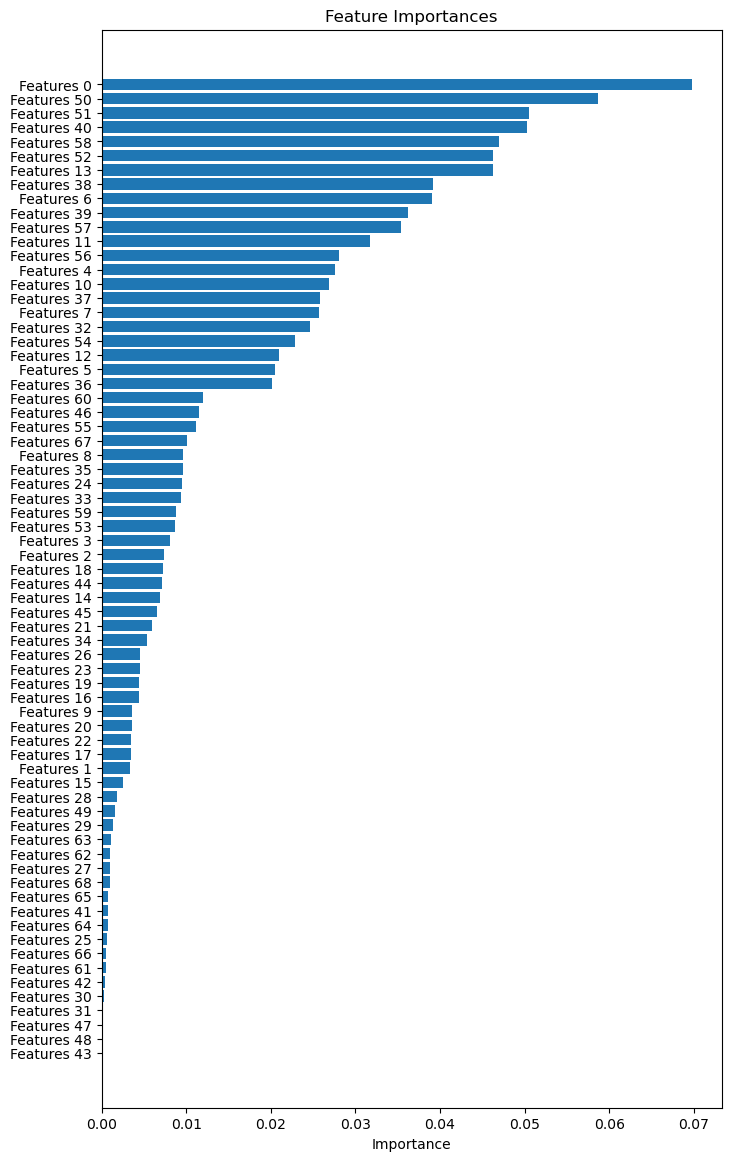

In [22]:
importances = rf_model.feature_importances_

indices = sorted(range(len(importances)), key=lambda i: importances[i], reverse=False)
feature_names = [f"Features {i}" for i in indices]  

plt.figure(figsize=(8, 14))
plt.barh(range(X_train.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), feature_names)
plt.xlabel("Importance")
plt.title("Feature Importances")
plt.show()


### Model Evaluation


Random Forest Metrics:
Accuracy (Akurasi Total): 0.9991
F1 Score (Keseimbangan): 0.9991
Precision (Ketepatan Prediksi Attack): 0.9988
Recall (Sensitivitas Deteksi Attack): 0.9993

Laporan Klasifikasi Lengkap:
               precision    recall  f1-score   support

           0     0.9993    0.9988    0.9991    167294
           1     0.9988    0.9993    0.9991    167294

    accuracy                         0.9991    334588
   macro avg     0.9991    0.9991    0.9991    334588
weighted avg     0.9991    0.9991    0.9991    334588



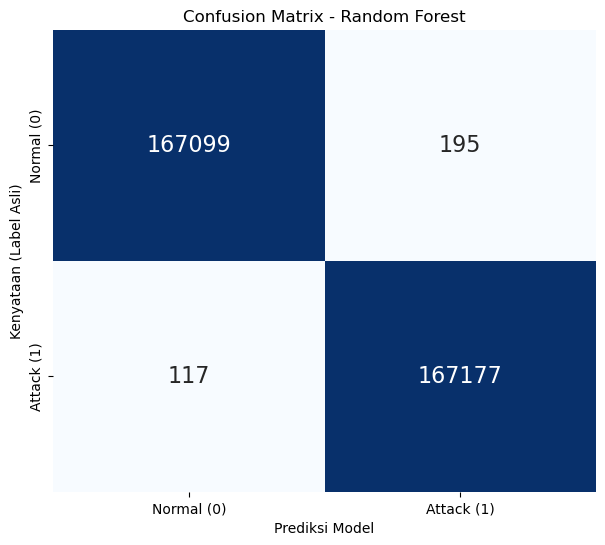

In [23]:
def plot_confusion_matrix(y_true, y_pred, classes, title):
    cm = confusion_matrix(y_true, y_pred)
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]     
    plt.figure(figsize=(7, 6))
    sns.heatmap(cm_percent, annot=cm, fmt='d', cmap='Blues', 
                xticklabels=classes, yticklabels=classes,
                annot_kws={"fontsize":16}, cbar=False) 
    plt.title(title)
    plt.xlabel('Prediksi Model')
    plt.ylabel('Kenyataan (Label Asli)')
    plt.show()

# Hitung Metrik Utama
rf_accuracy = accuracy_score(Y_test, rf_pred)
rf_f1 = f1_score(Y_test, rf_pred)
rf_recall = recall_score(Y_test, rf_pred)
rf_precision = precision_score(Y_test, rf_pred) # Hitung Precision juga

# Visualisasi dan Laporan
print('\nRandom Forest Metrics:')
print(f'Accuracy (Akurasi Total): {rf_accuracy:.4f}')
print(f'F1 Score (Keseimbangan): {rf_f1:.4f}')
print(f'Precision (Ketepatan Prediksi Attack): {rf_precision:.4f}')
print(f'Recall (Sensitivitas Deteksi Attack): {rf_recall:.4f}')
print('\nLaporan Klasifikasi Lengkap:\n', classification_report(Y_test, rf_pred, digits=4))

# Plot Confusion Matrix
classes = ['Normal (0)', 'Attack (1)']
plot_confusion_matrix(Y_test, rf_pred, classes, 'Confusion Matrix - Random Forest')

## Logistic Regression

In [24]:
lr_model = LogisticRegression(random_state=42, max_iter=300)
lr_model.fit(X_train, Y_train)
lr_pred = lr_model.predict(X_test)

/home/dafa/anaconda3/envs/dafa/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Evaluation Logistic Regression


Logistic Regression Metrics:
Accuracy (Akurasi Total): 0.9129
F1 Score (Keseimbangan): 0.9142
Precision (Ketepatan Prediksi Attack): 0.9015
Recall (Sensitivitas Deteksi Attack): 0.9272

Laporan Klasifikasi Lengkap:
               precision    recall  f1-score   support

           0     0.9251    0.8986    0.9117    167294
           1     0.9015    0.9272    0.9142    167294

    accuracy                         0.9129    334588
   macro avg     0.9133    0.9129    0.9129    334588
weighted avg     0.9133    0.9129    0.9129    334588



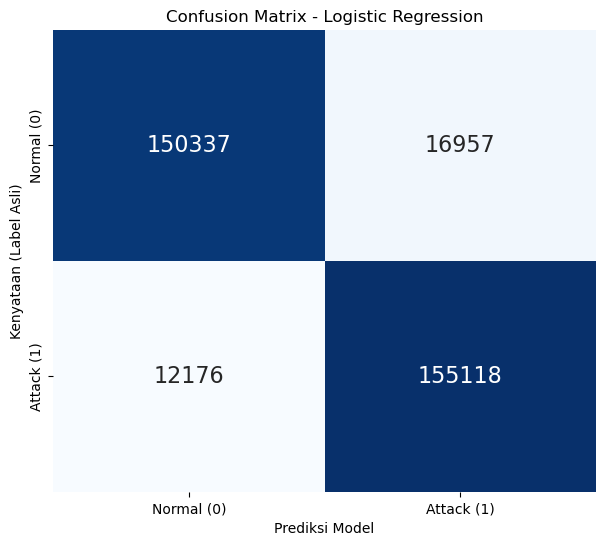

In [25]:
# Hitung Metrik Utama
lr_accuracy = accuracy_score(Y_test, lr_pred)
lr_f1 = f1_score(Y_test, lr_pred)
lr_recall = recall_score(Y_test, lr_pred)
lr_precision = precision_score(Y_test, lr_pred) # Hitung Precision juga

# Visualisasi dan Laporan
print('\nLogistic Regression Metrics:')
print(f'Accuracy (Akurasi Total): {lr_accuracy:.4f}')
print(f'F1 Score (Keseimbangan): {lr_f1:.4f}')
print(f'Precision (Ketepatan Prediksi Attack): {lr_precision:.4f}')
print(f'Recall (Sensitivitas Deteksi Attack): {lr_recall:.4f}')
print('\nLaporan Klasifikasi Lengkap:\n', classification_report(Y_test, lr_pred, digits=4))

# Plot Confusion Matrix
classes = ['Normal (0)', 'Attack (1)']
plot_confusion_matrix(Y_test, lr_pred, classes, 'Confusion Matrix - Logistic Regression')

## Neural Network

In [26]:
nn_model = MLPClassifier(hidden_layer_sizes=(32,), max_iter=300, random_state=42,verbose=False,early_stopping=True)
nn_model.fit(X_train, Y_train)
nn_pred = nn_model.predict(X_test)

/home/dafa/anaconda3/envs/dafa/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/dafa/anaconda3/envs/dafa/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/dafa/anaconda3/envs/dafa/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/dafa/anaconda3/envs/dafa/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/dafa/anaconda3/envs/dafa/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/dafa/anaconda3

### Evaluate Neural Network


Neural Network Metrics:
Accuracy (Akurasi Total): 0.9849
F1 Score (Keseimbangan): 0.9850
Precision (Ketepatan Prediksi Attack): 0.9778
Recall (Sensitivitas Deteksi Attack): 0.9923

Laporan Klasifikasi Lengkap:
               precision    recall  f1-score   support

           0     0.9251    0.8986    0.9117    167294
           1     0.9015    0.9272    0.9142    167294

    accuracy                         0.9129    334588
   macro avg     0.9133    0.9129    0.9129    334588
weighted avg     0.9133    0.9129    0.9129    334588



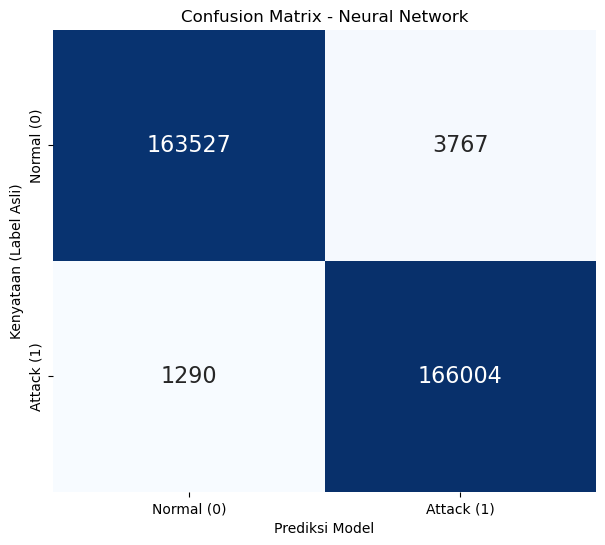

In [27]:
# Hitung Metrik Utama
nn_accuracy = accuracy_score(Y_test, nn_pred)
nn_f1 = f1_score(Y_test, nn_pred)
nn_recall = recall_score(Y_test, nn_pred)
nn_precision = precision_score(Y_test, nn_pred) # Hitung Precision juga

# Visualisasi dan Laporan
print('\nNeural Network Metrics:')
print(f'Accuracy (Akurasi Total): {nn_accuracy:.4f}')
print(f'F1 Score (Keseimbangan): {nn_f1:.4f}')
print(f'Precision (Ketepatan Prediksi Attack): {nn_precision:.4f}')
print(f'Recall (Sensitivitas Deteksi Attack): {nn_recall:.4f}')
print('\nLaporan Klasifikasi Lengkap:\n', classification_report(Y_test, lr_pred, digits=4))

# Plot Confusion Matrix
classes = ['Normal (0)', 'Attack (1)']
plot_confusion_matrix(Y_test, nn_pred, classes, 'Confusion Matrix - Neural Network')

# Model Comparison

In [37]:
rf_proba = rf_model.predict_proba(X_test)
lr_proba = lr_model.predict_proba(X_test)
nn_proba = nn_model.predict_proba(X_test)

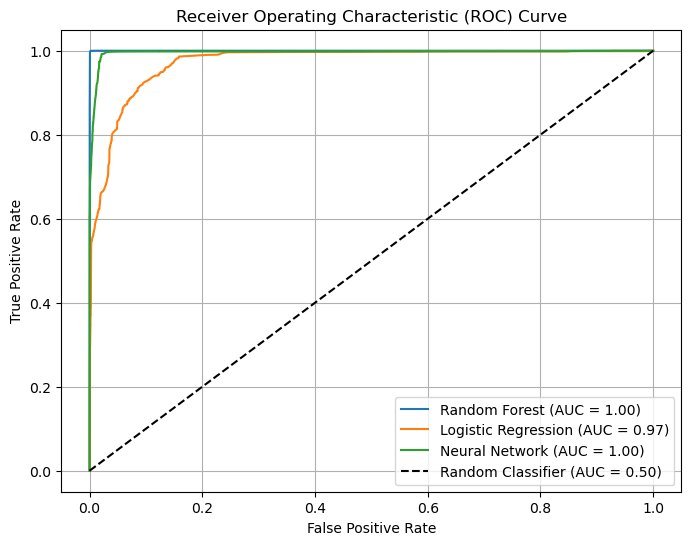

In [38]:
rf_fpr, rf_tpr, _ = roc_curve(Y_test, rf_proba[:, 1])
rf_auc = auc(rf_fpr, rf_tpr)

lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_proba[:, 1])
lr_auc = auc(lr_fpr, lr_tpr)

nn_fpr, nn_tpr, _ = roc_curve(Y_test, nn_proba[:, 1])
nn_auc = auc(nn_fpr, nn_tpr)

plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot(nn_fpr, nn_tpr, label=f'Neural Network (AUC = {nn_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random Classifier (AUC = 0.50)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()